In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/fancyshmancy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# use data from January 2015 to September 2015
dfSp = pd.read_csv('201504-citibike-tripdata.csv')
dfSu = pd.read_csv('201506-citibike-tripdata.csv')
dfF = pd.read_csv('201509-citibike-tripdata.csv')
dfW = pd.read_csv('201501-citibike-tripdata.csv')

In [3]:
dfSp['age'] = 2015-dfSp['birth year'][(dfSp['usertype'] == 'Subscriber')]
dfSu['age'] = 2015-dfSu['birth year'][(dfSu['usertype'] == 'Subscriber')]
dfF['age'] = 2015-dfF['birth year'][(dfF['usertype'] == 'Subscriber')]
dfW['age'] = 2015-dfW['birth year'][(dfW['usertype'] == 'Subscriber')]

In [4]:
#print len(dfSp), len(dfSu), len(dfF), len(dfW)
warmFrames = [dfSp, dfSu]
coldFrames = [dfF, dfW]
ss = pd.concat(warmFrames, axis=0, ignore_index=True)
fw = pd.concat(coldFrames, axis=0, ignore_index=True)
print len(ss), len(fw)
#print type(ss), type(fw)

1593609 1575251


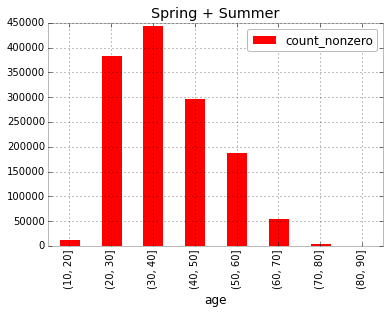

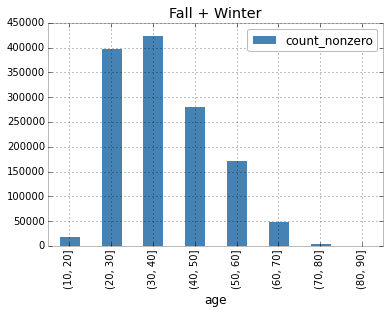

In [11]:
bins = np.arange(10, 99, 10)
ssDis = ss['age'].groupby(pd.cut(ss['age'], bins)).agg([count_nonzero])
ssDis.plot(kind='bar',title='Spring + Summer',color='r')
fwDis = fw['age'].groupby(pd.cut(fw['age'], bins)).agg([count_nonzero])
fwDis.plot(kind='bar',title='Fall + Winter')

### KS test

In [13]:
from scipy import stats
#compare to normal

ksSS=stats.kstest(ssDis, 'norm')
ksFW=stats.kstest(fwDis, 'norm')
print "spring and summer, normal fit", ksSS
print "fall and winter, normal fit", ksFW

#compare to poisson 

ksSS=stats.kstest(ssDis, 'cauchy')
ksFW=stats.kstest(fwDis, 'cauchy')
print "spring and summer, poisson fit", ksSS
print "fall and winter, poisson fit", ksFW

spring and summer, normal fit (1.0, 0.0)
fall and winter, normal fit (1.0, 0.0)
spring and summer, poisson fit (0.99999928691625795, 0.0)
fall and winter, poisson fit (0.99999925349638907, 0.0)


The poisson fit is better in this case.

In [14]:
ksG = stats.ks_2samp(ss.age[~np.isnan(ss.age)],fw.age[~np.isnan(fw.age)])
print "KS by season: ", ksG

KS by season:  (0.024470290985035142, 0.0)


### Anderson test

In [31]:
#compare to normal

adSS=stats.anderson(ss.age[~np.isnan(ss.age)], 'norm')
adFW=stats.anderson(fw.age[~np.isnan(fw.age)], 'norm')
print "spring and summer, normal fit", ksSS
print "fall and winter, normal fit", ksFW

#compare to poisson 

adSS=stats.anderson(ss.age[~np.isnan(ss.age)], 'logistic')
adFW=stats.anderson(fw.age[~np.isnan(fw.age)], 'logistic')
print "spring and summer, logistic fit", adSS
print "fall and winter, logistic fit", adFW

spring and summer, normal fit (0.99999928691625795, 0.0)
fall and winter, normal fit (0.99999925349638907, 0.0)
spring and summer, logistic fit (18323.550098531647, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
fall and winter, logistic fit (17641.743746157037, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
